<a href="https://colab.research.google.com/github/ju-sants/Exercicios/blob/main/exercicios_gpt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns
import plotly.express as px

In [ ]:
casas = pd.read_excel('houses_rent.xlsx')

In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           6080 non-null   int64 
 1   city            6080 non-null   object
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   int64 
 11  property tax    6080 non-null   int64 
 12  fire insurance  6080 non-null   int64 
 13  total           6080 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 665.1+ KB


In [ ]:
casas['tax%'] = '10%'
casas['tax'] = (casas['rent amount'] / 100) * 10
casas['total_with_tax'] = casas['total'] + casas['tax']

In [ ]:
casas.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,tax%,tax,total_with_tax
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121,10%,800.0,9921.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493,10%,82.0,1575.0
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680,10%,700.0,13380.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116,10%,125.0,2241.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257,10%,120.0,1377.0


In [ ]:
casas[['rent amount', 'property tax', 'fire insurance']].corr()

,rent amount,property tax,fire insurance
rent amount,1.000000,0.058209,0.985890
property tax,0.058209,1.000000,0.058365
fire insurance,0.985890,0.058365,1.000000


<Axes: >

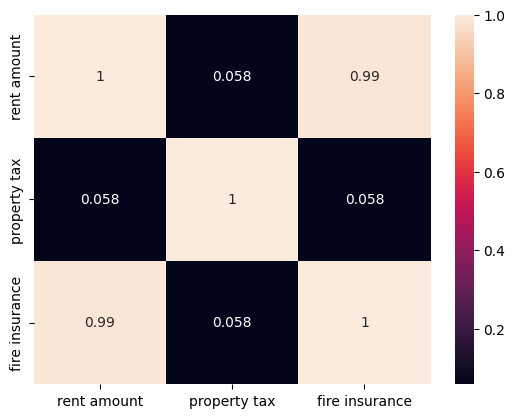

In [ ]:
sns.heatmap(casas[['rent amount', 'property tax', 'fire insurance']].corr(), annot=True)

<Axes: xlabel='fire insurance', ylabel='rent amount'>

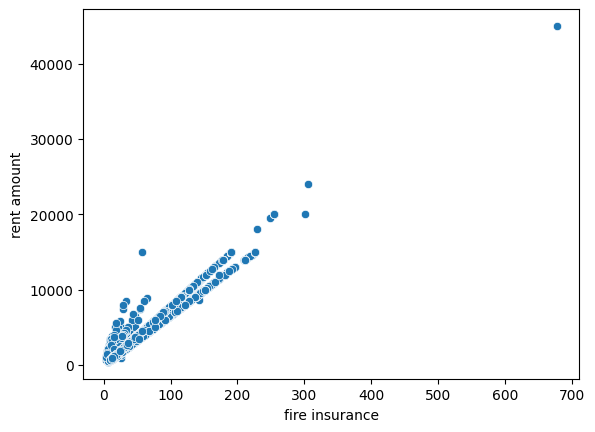

In [ ]:
sns.scatterplot(casas, x='fire insurance', y='rent amount')

<Axes: xlabel='rooms', ylabel='total'>

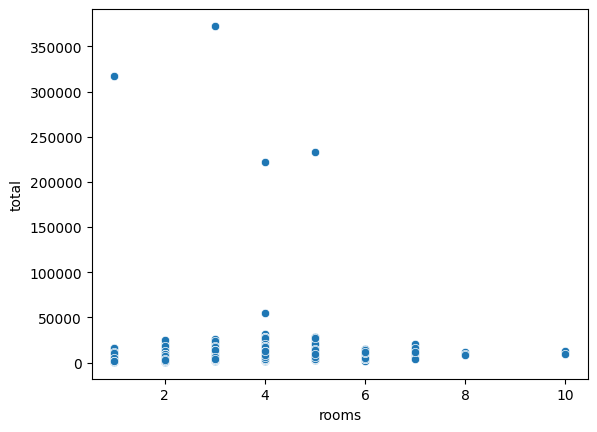

In [ ]:
sns.scatterplot(casas, x='rooms', y='total')

In [ ]:
casas[['rooms', 'total']].corr()

,rooms,total
rooms,1.000000,0.310166
total,0.310166,1.000000


In [ ]:
px.box(casas.groupby('city').total.mean().reset_index(), x='total')

In [ ]:
px.bar(casas.query('rooms > 3').groupby(['city', 'floor']).total.mean().reset_index(), x='floor', y='total', color='city')

<Axes: xlabel='area', ylabel='total'>

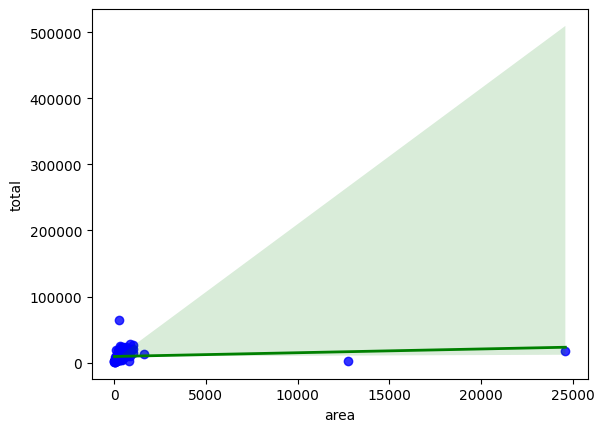

In [ ]:
media_total_area = casas.groupby('area').total.mean().reset_index()
sns.regplot(media_total_area, x='area', y='total', scatter_kws={'color': 'blue'}, line_kws={'color': 'green', 'linewidth': '2'})